In [ ]:
from google.colab import files
uploaded = files.upload()


Saving obesity_selected_30variables.csv to obesity_selected_30variables.csv


In [ ]:
import pandas as pd

df = pd.read_csv("obesity_selected_30variables.csv")
df.head()


,KNN_pred,LR_pred,DT_pred,FCVC,PCA3,PCA1,Age,CH2O,NCP,PCA2,...,MTRANS_Automobile,FAVC_yes,CAEC_Frequently,FAVC_no,SCC_no,CAEC_Always,CAEC_no,CALC_Frequently,SCC_yes,NObeyesdad_label
0,2,1,2,2.000000,0.102810,-5.356973,19.000000,3.000000,3.000000,0.589872,...,0,1,1,0,1,0,0,1,0,Overweight_Level_I
1,2,6,1,2.000000,-0.367841,-2.357921,22.000000,3.000000,3.000000,0.595390,...,0,0,0,1,1,0,0,0,0,Normal_Weight
2,6,5,1,3.000000,-0.060673,-6.326491,18.000000,2.000000,3.000000,1.766576,...,0,1,0,0,1,0,0,0,0,Normal_Weight
3,5,3,5,2.793561,0.879665,-4.823541,19.506389,2.429059,3.788602,1.454875,...,0,1,0,0,1,0,0,0,0,Overweight_Level_I
4,5,5,1,1.972545,0.043904,-7.247341,17.085250,1.711074,2.339614,-1.390339,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 종속 변수(비만도)
target = "NObeyesdad_label"


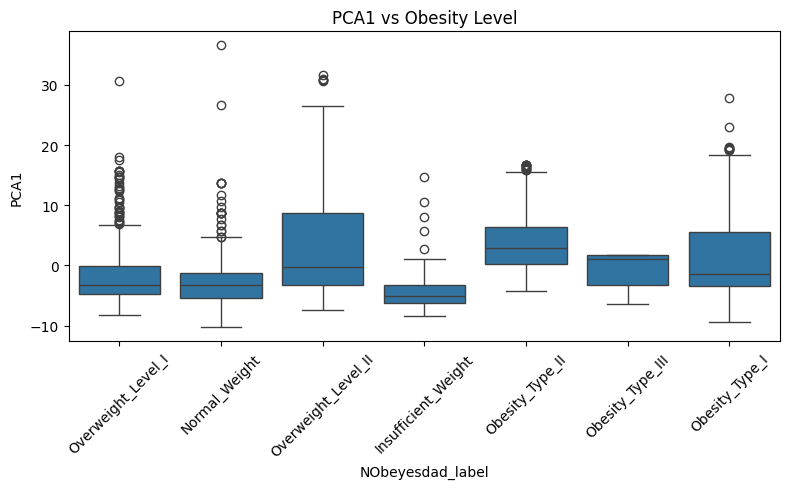

In [ ]:
#① PCA1 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA1"])
plt.title("PCA1 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

① PCA1 vs Obesity — Boxplot

그래프 설명

PCA1은 여러 생활습관 변수를 선형 결합한 “종합 행동 패턴 축”

boxplot은 비만도(NObeyesdad)의 각 등급과 PCA1의 분포 차이를 보여줌.

해석

비만도가 증가할수록 PCA1 값이 확연히 변화한다면,
PCA1이 비만도 구분에 의미 있는 축이라는 것을 의미함.

특히 비만(Obesity Type I~III) 구간에서 중앙값이 높거나 낮게 치우친다면
행동 패턴이 정상 체중과 체계적으로 다르다는 의미.

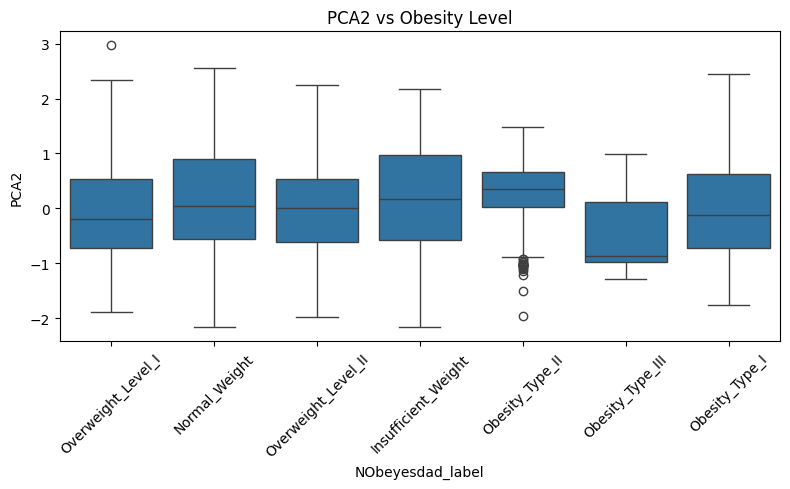

In [ ]:
#② PCA2 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA2"])
plt.title("PCA2 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

② PCA2 vs Obesity — Boxplot

그래프 설명

PCA2는 또 다른 생활습관 조합 축.

각 비만도 단계에서 PCA2 값 분포 차이를 비교.

해석

PCA2가 체중 부족, 정상, 과체중, 비만에서 뚜렷하게 구분된다면
두 번째 행동 패턴 축도 비만 분류에 기여하고 있음을 의미.

PCA1보다 분산이 작거나 차이가 적다면 설명력이 상대적으로 낮다는 의미.

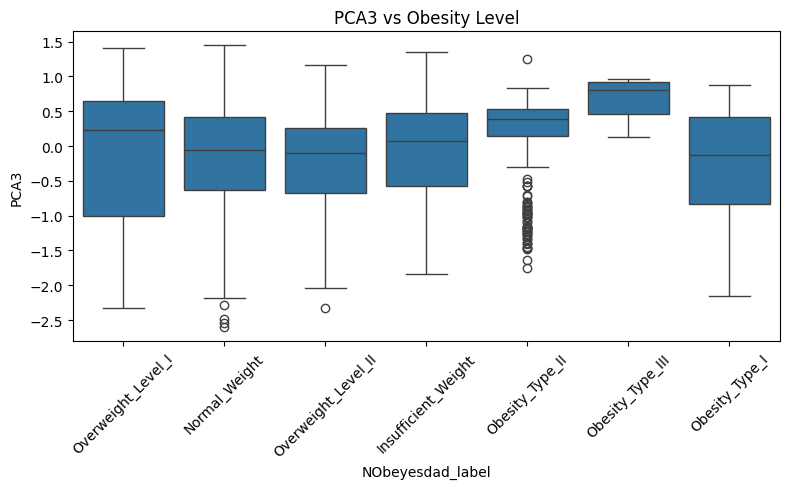

In [ ]:
#③ PCA3 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA3"])
plt.title("PCA3 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

③ PCA3 vs Obesity — Boxplot

그래프 설명

PCA3는 잔여 행동 요인을 설명하는 축.

해석

PCA3의 분포 변화가 미미하거나 비슷하다면
PCA3는 비만 수준을 구분하는 데 기여도가 낮은 축일 가능성이 높음.

반대로 특정 비만 단계에서 극단치가 많다면 특이 행동 패턴 존재 시사.

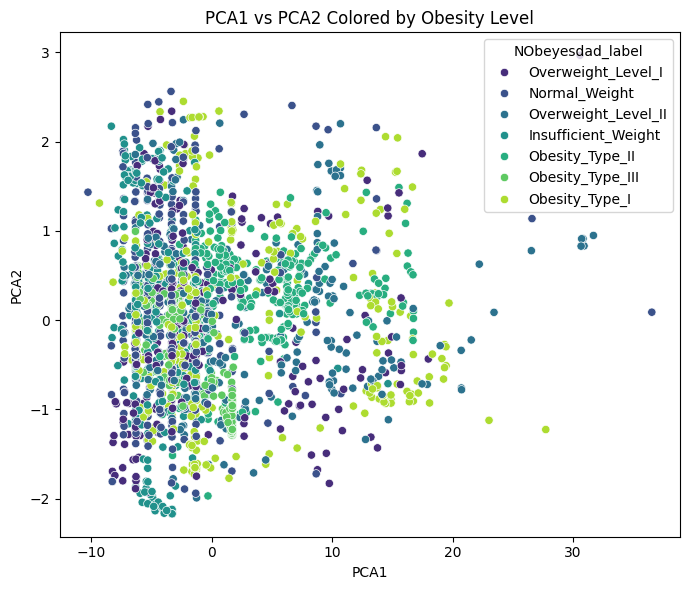

In [ ]:
#④ PCA1 vs PCA2 (색: 비만도) — Scatterplot
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue=target, palette="viridis")
plt.title("PCA1 vs PCA2 Colored by Obesity Level")
plt.tight_layout()
plt.show()

④ PCA1 vs PCA2 (색: Obesity) — Scatterplot

그래프 설명

x축: PCA1

y축: PCA2

색상: 비만도 단계

각 개인이 어떤 행동 패턴 공간에 위치하는지 군집 형태를 시각적으로 보여줌.

해석

정상 vs 비만이 서로 다른 영역에 모여 있다면
생활 패턴만으로도 비만도를 상당히 구분 가능함.

군집이 겹친다면 행동 패턴이 유사한 정상/비만 그룹이 존재함을 의미.

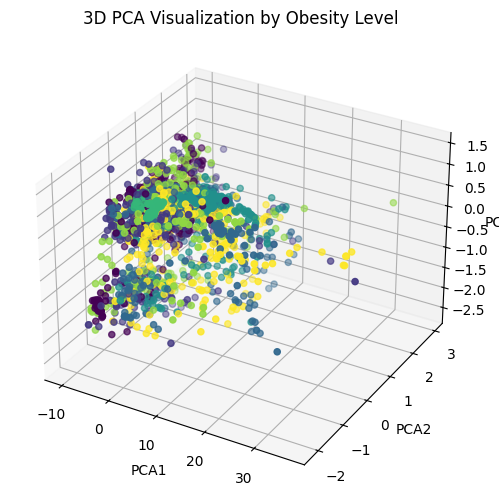

In [ ]:
#⑤ PCA1 · PCA2 · PCA3 — 3D Scatterplot
df["Obesity_num"] = df["NObeyesdad_label"].astype("category").cat.codes

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["PCA1"],
    df["PCA2"],
    df["PCA3"],
    c=df["Obesity_num"],
    cmap="viridis"
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D PCA Visualization by Obesity Level")
plt.show()



⑤ PCA1 · PCA2 · PCA3 — 3D Scatterplot

그래프 설명

3개의 PCA 축을 모두 사용하여 행동 패턴을 3차원 공간에 표현.

색은 비만도.

해석

3차원에서 뚜렷한 군집이 형성되면
PCA 기반 행동 패턴만으로 비만 레벨이 거의 분리된다는 의미.

군집이 혼합되면 PCA로 설명되지 않는 요인(유전, 신체 지표 등)이 존재함.